In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import sys

In [2]:
from FloaterParameters import FloaterParameters
from Environment import Environment
from Buoy import Buoy
from Mass import Mass
from Density import Density
from Area import Area
from GeneralisedCoordinateSystem import GeneralisedCoordinateSystem
from SystemMatrices import MatrixCalculation
from ComputeHydroCoefficients import CompHydroCoefficient
from plot_hydroD_results import plot_hydroD_results
from ReadWadamLis import ReadWadamLis
from CheckInterpolation import InterpolateParameters

Unable to import mpi4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.


In [3]:
write = 0
plots = 1

In [4]:
parameters = [[55,60,80,100,120,130],
              [90,90,90,90,90]]
column_diameter = [12]

In [5]:
if write == 1:
    for ii in np.linspace(0,len(column_diameter)-1,len(column_diameter)).astype(int):
        for jj in np.linspace(0,len(parameters[0])-1,len(parameters[0])).astype(int):
            file_loc = r'C:\Users\Joar\Documents\1_Education\NTNU\pickle_files'
            file_name = "\sim_x_%f_y_%f_D%f" % (parameters[0][jj],parameters[1][jj],column_diameter[ii])
            file_path = file_loc + file_name
            floater = FloaterParameters(parameters[0][jj],parameters[1][jj], column_diameter[ii])
            rho = Density()
            area = CrossSectionalArea(floater)
            buoy = Buoy(floater, area, rho)
            mass = Mass(floater, area, buoy, rho)
            coord = GeneralisedCoordinateSystem(floater, area, mass, rho, buoy)
            genie = CompHydroCoefficient()
            genie.compute(coord, mass, floater)
            sim = ReadWadamLis(genie.HydroD_result)
            file_sim = open(file_path, 'wb') 
            pickle.dump(sim, file_sim)
            file_sim.close()

In [6]:
results = []
interp_inputs = np.array([[40,80,12],
                          [50,80,12],
                          [60,80,12]])

In [7]:
for i in np.linspace(0, len(interp_inputs[:, 1]) - 1, len(interp_inputs)).astype(int):
    file_loc = r'C:\Users\Joar\Documents\1_Education\NTNU\pickle_files'
    file_name = "\sim_x_%d_y_%d_D%d" % (interp_inputs[i, 0], interp_inputs[i, 1], interp_inputs[i, 2])
    file_path = file_loc + file_name
    infile = open(file_path, 'rb')
    results.append(pickle.load(infile))
    infile.close()

In [8]:
interp_inputs = np.array([[40,80,12],
                          [60,80,12]])
design = [50, 80, 12]
sim = InterpolateParameters(interp_inputs, design)
results.append(sim)

In [9]:
interp_inputs = np.array([[40,80,12],
                          [50,80,12],
                          [60,80,12]])

In [10]:
interp_inputs[2, 0]

60

In [20]:
    def _plot_interpolation(results, design, interp_inputs):

        #################################################################################
        styles = ['-b', '-c', '-r', '-m', '-g', '-y']
        styles2 = ['-m', '-g', '-y', '-b', '-c', '-r']
        styles_dashed = ['--b', '--c', '--r', '--m', '--g', '--y']

        ADDEDMASS_yaxis = ['Added Mass [KG] (DOF:Surge)',
                            'Added Mass [KG] (DOF:Sway)',
                            'Added Mass [KG] (DOF:Heave)',
                            'Added Mass [KG-m] (DOF:Roll)',
                            'Added Mass [KG-m] (DOF:Pitch)',
                            'Added Mass [KG-m] (DOF:Yaw)']
        plt.rcParams.update({'font.size': 15})
        plt.rcParams["figure.figsize"] = (10, 20)
        fig, axs = plt.subplots(4, 1)
        for x, ii in enumerate([0,1,2,4]):
            axs[x].plot(results[0].wave_disc[:, 4], results[0].ADDEDMASS[:, ii, ii], '-+m',
                         label="HydroD Sim (x=%d y=%d D=%d)" % (interp_inputs[0, 0], interp_inputs[0, 1], interp_inputs[0, 2]),
                         linewidth=1, markersize=2)
            axs[x].plot(results[1].wave_disc[:, 4], results[1].ADDEDMASS[:, ii, ii], '-or',
                         label="HydroD Sim (x=%d y=%d D=%d)" % (interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[1, 2]),
                         linewidth=2, markersize=2)
            axs[x].plot(results[2].wave_disc[:, 4], results[2].ADDEDMASS[:, ii, ii], '-og',
                         label="HydroD Sim (x=%d y=%d D=%d)" % (interp_inputs[2, 0], interp_inputs[2, 1], interp_inputs[2, 2]),
                         linewidth=1, markersize=2)
            axs[x].plot(results[1].wave_disc[:, 4], results[3].ADDEDMASS[:, ii, ii], '--ob',
                         label="Interpolated at x= %d" % design[0],
                         linewidth=2, markersize=2)
            axs[x].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
            axs[x].legend(loc="upper right")
            axs[x].set(ylabel=ADDEDMASS_yaxis[ii])
            axs[x].set(xlabel='Omega [rad]')
            axs[x].grid(b=True, which='both', axis='both')
        plt.tight_layout()


        #################################################################################


        Damping_yaxis = [['Damping [kg/s] (DOF:Surge)'],
                            ['Damping [kg/s] (DOF:Sway)'],
                            ['Damping [kg/s] (DOF:Heave)'],
                            ['Damping [kg-m/s] (DOF:Roll)'],
                            ['Damping [kg-m/s] (DOF:Pitch)'],
                            ['Damping [kg-m/s] (DOF:Yaw)']]

        plt.rcParams["figure.figsize"] = (10, 20)
        fig, axs = plt.subplots(4, 1)
        for x, ii in enumerate([0,1,2,4]):
            axs[x].plot(results[0].wave_disc[:, 4], results[0].DAMPING[:, ii, ii], '-+m',
                         label="HydroD Sim (x=%d y=%d D=%d)" % (interp_inputs[0, 0], interp_inputs[0, 1], interp_inputs[0, 2]),
                         linewidth=2, markersize=2)
            axs[x].plot(results[1].wave_disc[:, 4], results[1].DAMPING[:, ii, ii], '-or',
                         label="HydroD Sim (x=%d y=%d D=%d)" % (interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[1, 2]),
                         linewidth=2, markersize=2)
            axs[x].plot(results[2].wave_disc[:, 4], results[2].DAMPING[:, ii, ii], '-og',
                         label="HydroD Sim (x=%d y=%d D=%d)" % (interp_inputs[2, 0], interp_inputs[2, 1], interp_inputs[2, 2]),
                         linewidth=2, markersize=2)
            axs[x].plot(results[2].wave_disc[:, 4], results[3].DAMPING[:, ii, ii], '--ob',
                         label="Interpolated at  x=  %d" % design[0],
                         linewidth=2, markersize=2)
            axs[x].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
            axs[x].legend(loc="upper right")
            axs[x].set(ylabel=Damping_yaxis[ii])
            axs[x].grid(b=True, which='both', axis='both')
        plt.tight_layout()


        ####################################################################################################

        plt.rcParams["figure.figsize"] = (20, 20)    
        fig, axs = plt.subplots(2, 2)
        for jj in [0,2]:
            axs[0, 0].plot(results[0].wave_disc[:, 4], results[0].WAVEEX[0, :, jj, 2], '-+g',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[0, 0], interp_inputs[0, 1], interp_inputs[0, 2]),
                           linewidth=1, markersize=2)
            axs[0, 0].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[0, :, jj, 2], '-+b',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=1, markersize=2)
            axs[0, 0].plot(results[2].wave_disc[:, 4], results[2].WAVEEX[0, :, jj, 2], '-+m',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[2, 0], interp_inputs[2, 1], interp_inputs[0, 2]),
                           linewidth=1, markersize=2)
            axs[0, 0].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[0, :, jj, 2], '-+r',
                           label="|X%d| Interpolated at x= %d" % (jj+1, design[0]),
                           linewidth=1, markersize=2)
            axs[0, 0].legend(loc="upper right")
            axs[0, 0].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
            axs[0, 0].grid(b=True, which='both', axis='both')
            
        for jj in [4]:
            axs[0, 1].plot(results[0].wave_disc[:, 4], results[0].WAVEEX[0, :, jj, 2], '-+g',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1,interp_inputs[0, 0], interp_inputs[0, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=2)
            axs[0, 1].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[0, :, jj, 2], '-+b',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1,interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=2)
            axs[0, 1].plot(results[2].wave_disc[:, 4], results[2].WAVEEX[0, :, jj, 2], '-+m',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[2, 0], interp_inputs[2, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=2)
            axs[0, 1].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[0, :, jj, 2], '-+r',
                           label="|X%d| Interpolated at x= %d" % (jj+1, design[0]),
                           linewidth=2, markersize=2)
            axs[0, 1].legend(loc="upper right")
            axs[0, 1].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
            axs[0, 1].grid(b=True, which='both', axis='both')

        for jj in [0,2]:
            axs[1, 0].plot(results[0].wave_disc[:, 4], results[0].WAVEEX[1, :, jj, 2], '-+g',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1,interp_inputs[0, 0], interp_inputs[0, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 0].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[1, :, jj, 2], '-+b',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1,interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 0].plot(results[2].wave_disc[:, 4], results[2].WAVEEX[1, :, jj, 2], '-+m',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1,interp_inputs[2, 0], interp_inputs[2, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 0].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[1, :, jj, 2], '-+r',
                           label="|X%d| Interpolated at %d" % (jj+1, design[0]),
                           linewidth=2, markersize=5)
            axs[1, 0].legend(loc="upper right")
            axs[1, 0].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
            axs[1, 0].grid(b=True, which='both', axis='both')

        for jj in [4]:
            axs[1, 1].plot(results[0].wave_disc[:, 4], results[0].WAVEEX[1, :, jj, 2], '-+g',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[0, 0], interp_inputs[0, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 1].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[1, :, jj, 2], '-+b',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 1].plot(results[2].wave_disc[:, 4], results[2].WAVEEX[1, :, jj, 2], '-+m',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[2, 0], interp_inputs[2, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 1].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[1, :, jj, 2], '-+r',
                           label="|X%d| Interpolated at %d" % (jj+1, design[0]),
                           linewidth=2, markersize=5)
            axs[1, 1].legend(loc="upper right")
            axs[1, 1].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
            axs[1, 1].grid(b=True, which='both', axis='both')

        ######################################################################################

        fig, axs = plt.subplots(2, 2)
        for jj in [0,2]:
            axs[0, 0].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[0, :, jj, 2], styles[jj],
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[0, 0].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[0, :, jj, 2], styles_dashed[jj],
                           label="|X%d| Interpolated at %d" % (jj+1, design[0]),
                           linewidth=2, markersize=5)
            axs[0, 0].legend(loc="upper right")
            axs[0, 0].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
            axs[0, 0].grid(b=True, which='both', axis='both')

        for jj in [4]:
            axs[0, 1].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[0, :, jj, 2], styles[jj],
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1,interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[0, 1].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[0, :, jj, 2], styles_dashed[jj],
                           label="|X%d| Interpolated at %d" % (jj+1, design[0]),
                           linewidth=2, markersize=5)
            axs[0, 1].legend(loc="upper right")
            axs[0, 1].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
            axs[0, 1].grid(b=True, which='both', axis='both')

        for jj in [0,2]:
            axs[1, 0].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[1, :, jj, 2], styles[jj],
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1,interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 0].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[1, :, jj, 2], styles_dashed[jj],
                           label="|X%d| Interpolated at %d" % (jj+1, design[0]),
                           linewidth=2, markersize=5)
            axs[1, 0].legend(loc="upper right")
            axs[1, 0].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
            axs[1, 0].grid(b=True, which='both', axis='both')

        for jj in [4]:
            axs[1, 1].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[1, :, jj, 2], styles[jj],
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 1].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[1, :, jj, 2], styles_dashed[jj],
                           label="|X%d| Interpolated at %d" % (jj+1, design[0]),
                           linewidth=2, markersize=5)
            axs[1, 1].legend(loc="upper right")
            axs[1, 1].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
            axs[1, 1].grid(b=True, which='both', axis='both')

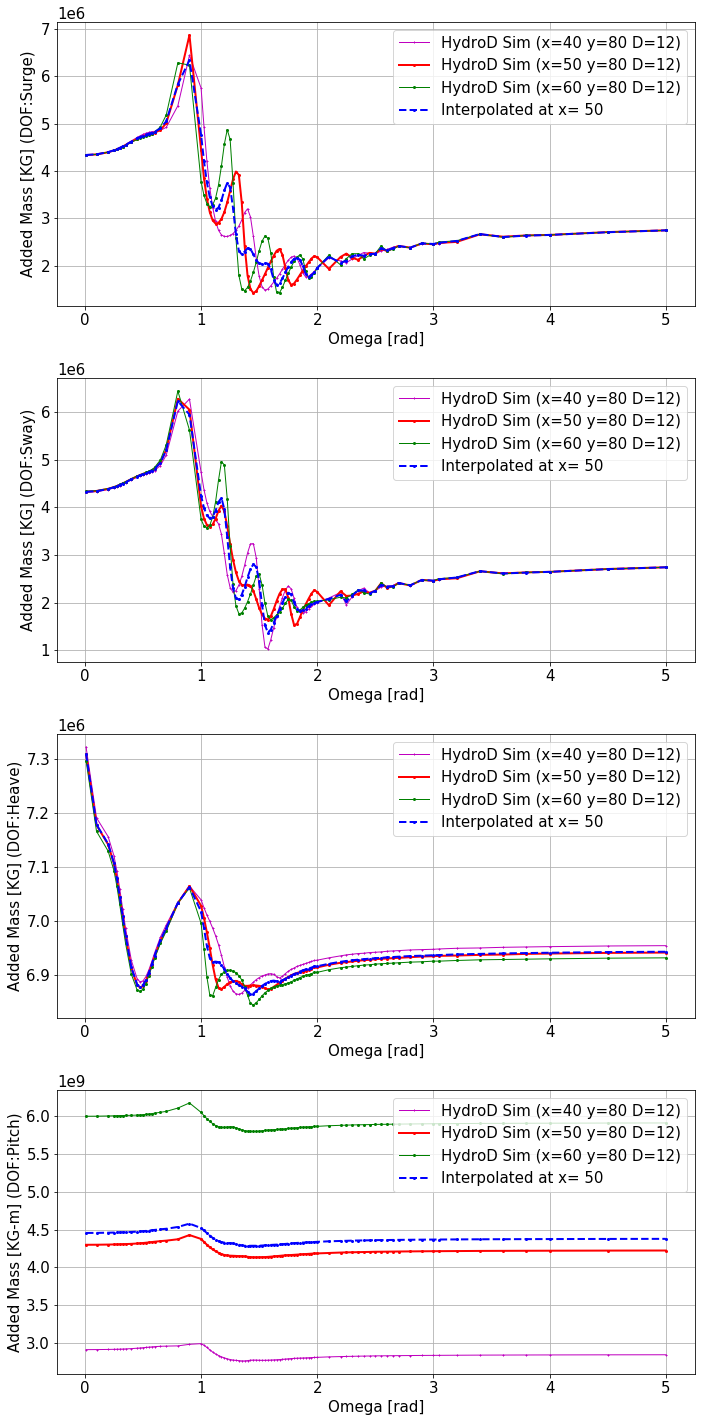

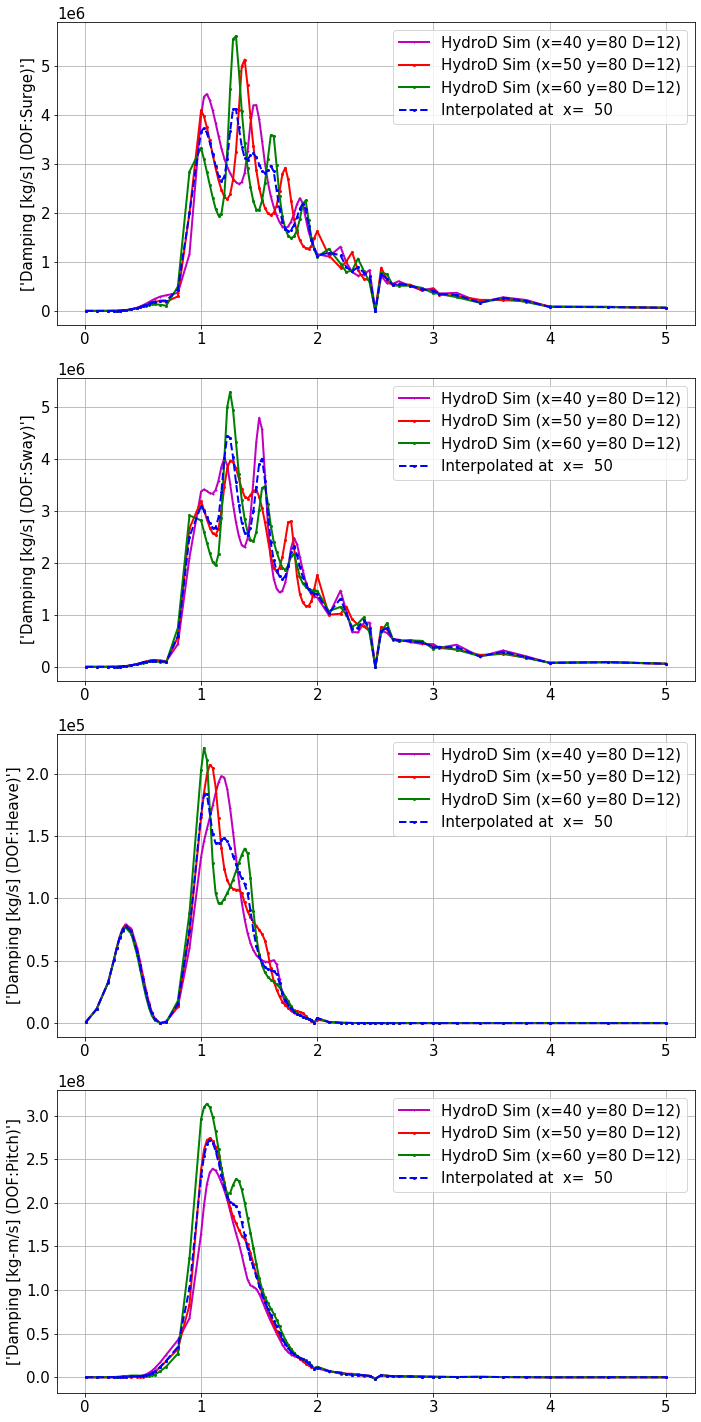

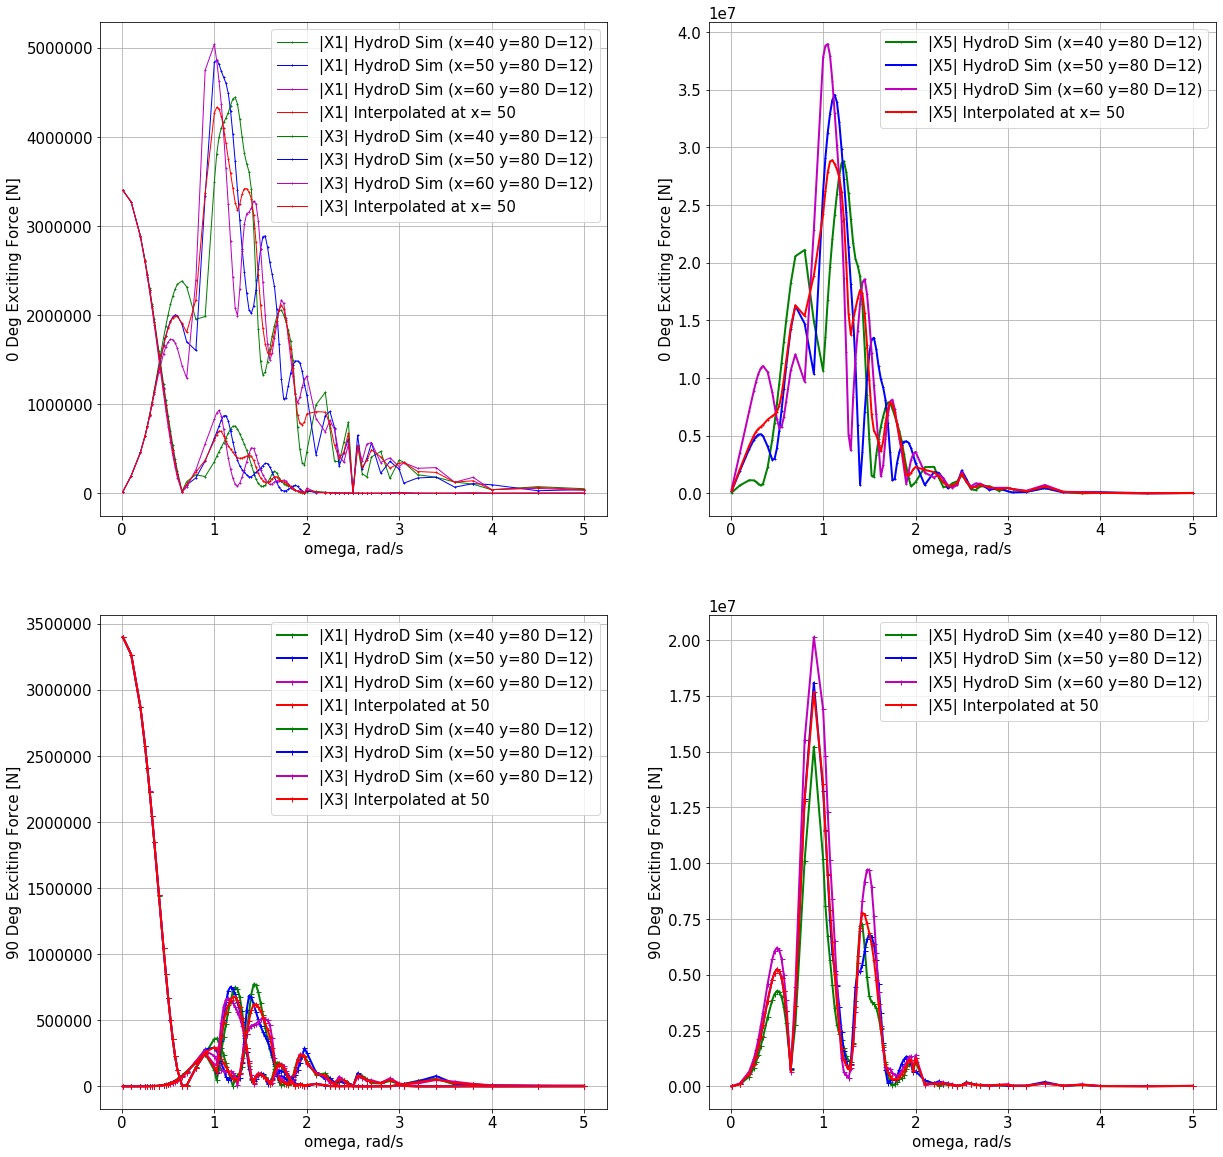

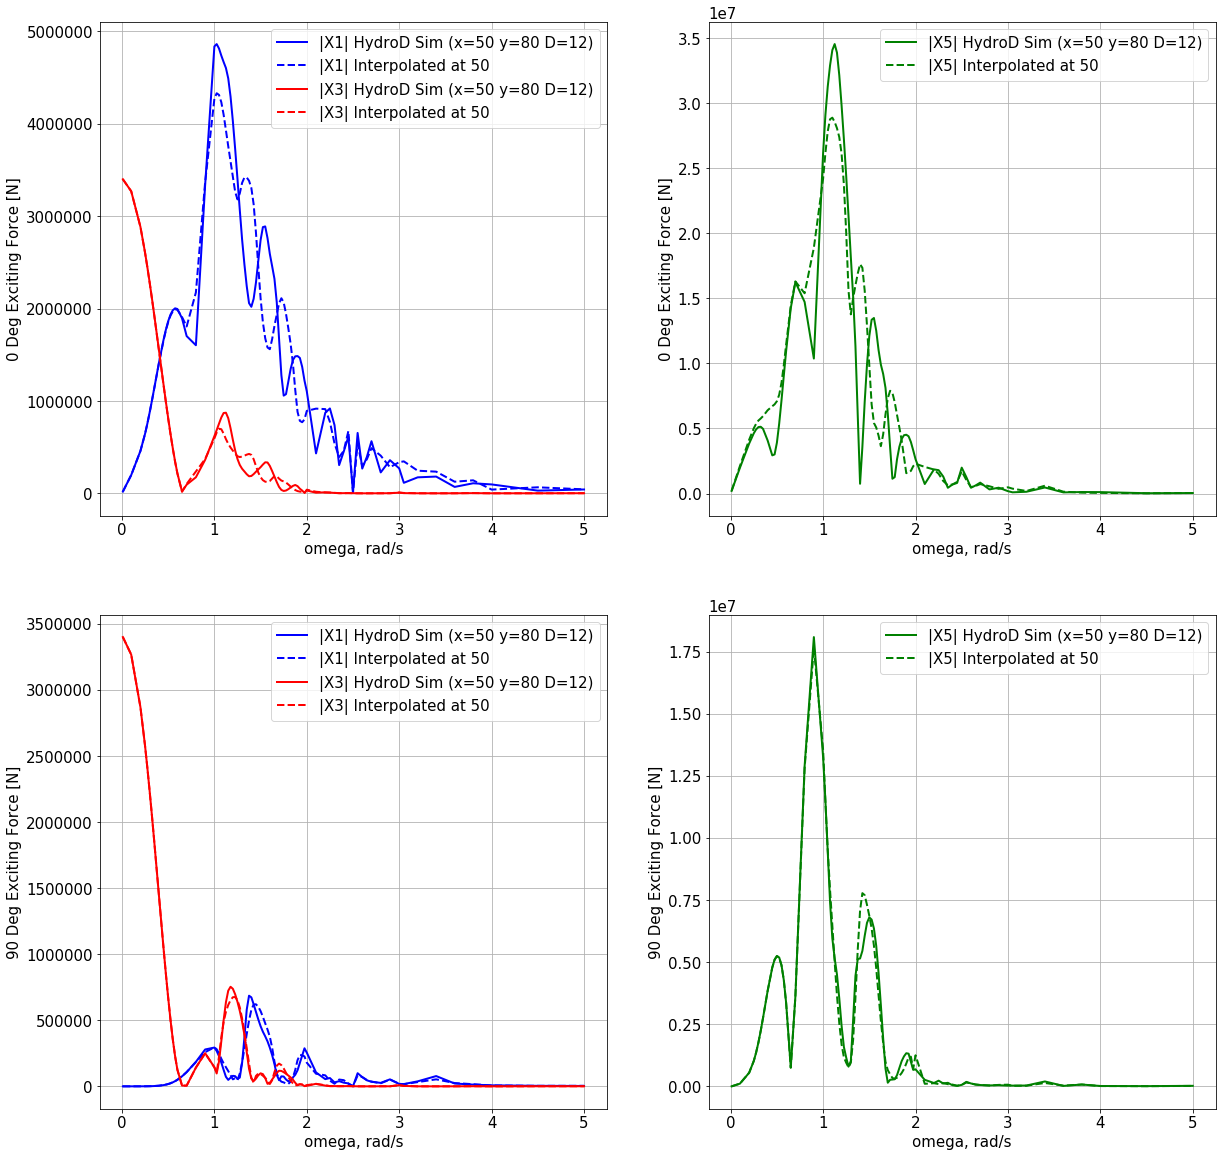

In [21]:
_plot_interpolation(results, design, interp_inputs)

In [13]:
_plot_interpolation(results, interp_inputs, interp_at)

NameError: name 'interp_at' is not defined

In [ ]:
if plots == 1:
    pull =  np.array([[40,80,12],[50,80,12],[60,80,12]])
    interp_at = [0,50]
    inter = InterpolateParameters(pull, interp_at)
    inter._plot_interpolation(pull, interp_at)

In [ ]:
if write == 0:
    file_loc = r'C:\Users\Joar\Documents\1_Education\NTNU\pickle_files'
    file_name = "\sim_x_%f_y_%f_D%f" % (pull[0,0],pull[0,1],pull[0,2])
    file_path = file_loc + file_name
    infile = open(file_path,'rb')
    sim1 = pickle.load(infile)
    infile.close()
    file_name = "\sim_x_%f_y_%f_D%f" % (pull[1,0],pull[1,1],pull[1,2])
    file_path = file_loc + file_name
    infile = open(file_path,'rb')
    sim2 = pickle.load(infile)
    infile.close()
    file_name = "\sim_x_%f_y_%f_D%f" % (pull[2,0],pull[2,1],pull[2,2])
    file_path = file_loc + file_name
    infile = open(file_path,'rb')
    sim3 = pickle.load(infile)
    infile.close()

In [ ]:
pull =   np.array([[50,70],[60,70],[70,70]])
interp_at = [60,0]
inter = InterpolateParameters(pull, interp_at)
inter._plot_interpolation(pull, interp_at)

In [ ]:
plots = plot_hydroD_results(sim1)

In [ ]:
    def _plot_interpolation(results, design, interp_inputs):

        #################################################################################
        styles = ['-b', '-c', '-r', '-m', '-g', '-y']
        styles_dashed = ['--b', '--c', '--r', '--m', '--g', '--y']

        ADDEDMASS_yaxis = [['Added Mass [KG] (DOF:Surge)'],
                            ['Added Mass [KG] (DOF:Sway)'],
                            ['Added Mass [KG] (DOF:Heave)'],
                            ['Added Mass [KG-m] (DOF:Roll)'],
                            ['Added Mass [KG-m] (DOF:Pitch)'],
                            ['Added Mass [KG-m] (DOF:Yaw)']]
        plt.rcParams.update({'font.size': 10})
        plt.rcParams["figure.figsize"] = (20, 20)
        fig, axs = plt.subplots(3, 1)
        for ii in [0,1,2,4]:
            axs[ii].plot(results[0].wave_disc[:, 4], results[0].ADDEDMASS[:, ii, ii], '-+m',
                         label="HydroD Sim (x=%d y=%d D=%d)" % (interp_inputs[0, 0], interp_inputs[0, 1], interp_inputs[0, 2]),
                         linewidth=1, markersize=5)
            axs[ii].plot(results[1].wave_disc[:, 4], results[1].ADDEDMASS[:, ii, ii], '-or',
                         label="HydroD Sim (x=%d y=%d D=%d)" % (interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[1, 2]),
                         linewidth=2, markersize=5)
            axs[ii].plot(results[2].wave_disc[:, 4], results[2].ADDEDMASS[:, ii, ii], '-og',
                         label="HydroD Sim (x=%d y=%d D=%d)" % (interp_inputs[2, 0], interp_inputs[2, 1], interp_inputs[2, 2]),
                         linewidth=1, markersize=5)
            axs[ii].plot(results[1].wave_disc[:, 4], results[3].ADDEDMASS[:, ii, ii], '--ob',
                         label="Interpolated at %d" % design[0],
                         linewidth=2, markersize=5)
            axs[ii].legend(loc="upper right")
            axs[ii].set(ylabel=ADDEDMASS_yaxis[ii])
            axs[ii].grid(b=True, which='both', axis='both')
        plt.tight_layout()


        #################################################################################

        plt.rcParams["figure.figsize"] = (20, 20)
        fig, axs = plt.subplots(6, 1)
        for ii in np.linspace(0, 5, 6).astype(int):
            axs[ii].plot(results[1].wave_disc[:, 4], results[1].ADDEDMASS[:, ii, ii], '-or',
                         label="HydroD Sim (x=%d y=%d D=%d)" % (interp_inputs[0, 1], interp_inputs[1, 1], interp_inputs[2, 1]),
                         linewidth=2, markersize=5)
            axs[ii].plot(results[1].wave_disc[:, 4], results[3].ADDEDMASS[:, ii, ii], '--ob',
                         label="Interpolated at %d" % design[0],
                         linewidth=2, markersize=5)
            axs[ii].legend(loc="upper right")
            axs[ii].set(ylabel=ADDEDMASS_yaxis[ii])
            axs[ii].grid(b=True, which='both', axis='both')
        plt.tight_layout()

        #################################################################################

        Damping_yaxis = [['Damping [kg/s] (DOF:Surge)'],
                            ['Damping [kg/s] (DOF:Sway)'],
                            ['Damping [kg/s] (DOF:Heave)'],
                            ['Damping [kg-m/s] (DOF:Roll)'],
                            ['Damping [kg-m/s] (DOF:Pitch)'],
                            ['Damping [kg-m/s] (DOF:Yaw)']]

        plt.rcParams["figure.figsize"] = (20, 20)
        fig, axs = plt.subplots(6, 1)
        for ii in np.linspace(0, 5, 6).astype(int):
            axs[ii].plot(results[0].wave_disc[:, 4], results[0].DAMPING[:, ii, ii], '-+m',
                         label="HydroD Sim (x=%d y=%d D=%d)" % (interp_inputs[0, 0], interp_inputs[0, 1], interp_inputs[0, 2]),
                         linewidth=2, markersize=5)
            axs[ii].plot(results[1].wave_disc[:, 4], results[1].DAMPING[:, ii, ii], '-or',
                         label="HydroD Sim (x=%d y=%d D=%d)" % (interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[1, 2]),
                         linewidth=2, markersize=5)
            axs[ii].plot(results[2].wave_disc[:, 4], results[2].DAMPING[:, ii, ii], '-og',
                         label="HydroD Sim (x=%d y=%d D=%d)" % (interp_inputs[2, 0], interp_inputs[2, 1], interp_inputs[2, 2]),
                         linewidth=2, markersize=5)
            axs[ii].plot(results[2].wave_disc[:, 4], results[3].DAMPING[:, ii, ii], '--ob',
                         label="Interpolated at %d" % design[0],
                         linewidth=2, markersize=5)
            axs[ii].legend(loc="upper right")
            axs[ii].set(ylabel=Damping_yaxis[ii])
            axs[ii].grid(b=True, which='both', axis='both')
        plt.tight_layout()

        ##################################################################################

        plt.rcParams["figure.figsize"] = (20, 20)
        fig, axs = plt.subplots(6, 1)
        for ii in np.linspace(0, 5, 6).astype(int):
            axs[ii].plot(results[1].wave_disc[:, 4], results[1].DAMPING[:, ii, ii], '-or',
                         label="HydroD Sim (x=%d y=%d D=%d)" % (interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[1, 2]),
                         linewidth=2, markersize=5)
            axs[ii].plot(results[2].wave_disc[:, 4], results[3].DAMPING[:, ii, ii], '--ob',
                         label="Interpolated at %d" % design[0],
                         linewidth=2, markersize=5)
            axs[ii].legend(loc="upper right")
            axs[ii].set(ylabel=Damping_yaxis[ii])
            axs[ii].grid(b=True, which='both', axis='both')
        plt.tight_layout()

        ####################################################################################################

        fig, axs = plt.subplots(2, 2)
        for jj in [0,2]:
            axs[0, 0].plot(results[0].wave_disc[:, 4], results[0].WAVEEX[0, :, jj, 2], '-+g',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[0, 0], interp_inputs[0, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[0, 0].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[0, :, jj, 2], '-+b',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[0, 0].plot(results[2].wave_disc[:, 4], results[2].WAVEEX[0, :, jj, 2], '-+m',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[2, 0], interp_inputs[2, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[0, 0].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[0, :, jj, 2], '-+r',
                           label="|X%d| Interpolated at %d" % (jj+1, design[0]),
                           linewidth=2, markersize=5)
            axs[0, 0].legend(loc="upper right")
            axs[0, 0].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
            axs[0, 0].grid(b=True, which='both', axis='both')
            
        for jj in [4]:
            axs[0, 1].plot(results[0].wave_disc[:, 4], results[0].WAVEEX[0, :, jj, 2], '-+g',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1,interp_inputs[0, 0], interp_inputs[0, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[0, 1].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[0, :, jj, 2], '-+b',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1,interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[0, 1].plot(results[2].wave_disc[:, 4], results[2].WAVEEX[0, :, jj, 2], '-+m',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[2, 0], interp_inputs[2, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[0, 1].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[0, :, jj, 2], '-+r',
                           label="|X%d| Interpolated at %d" % (jj+1, design[0]),
                           linewidth=2, markersize=5)
            axs[0, 1].legend(loc="upper right")
            axs[0, 1].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
            axs[0, 1].grid(b=True, which='both', axis='both')

        for jj in [0,2]:
            axs[1, 0].plot(results[0].wave_disc[:, 4], results[0].WAVEEX[1, :, jj, 2], '-+g',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1,interp_inputs[0, 0], interp_inputs[0, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 0].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[1, :, jj, 2], '-+b',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1,interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 0].plot(results[2].wave_disc[:, 4], results[2].WAVEEX[1, :, jj, 2], '-+m',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1,interp_inputs[2, 0], interp_inputs[2, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 0].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[1, :, jj, 2], '-+r',
                           label="|X%d| Interpolated at %d" % (jj+1, design[0]),
                           linewidth=2, markersize=5)
            axs[1, 0].legend(loc="upper right")
            axs[1, 0].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
            axs[1, 0].grid(b=True, which='both', axis='both')

        for jj in [4]:
            axs[1, 1].plot(results[0].wave_disc[:, 4], results[0].WAVEEX[1, :, jj, 2], '-+g',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[0, 0], interp_inputs[0, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 1].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[1, :, jj, 2], '-+b',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 1].plot(results[2].wave_disc[:, 4], results[2].WAVEEX[1, :, jj, 2], '-+m',
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[2, 0], interp_inputs[2, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 1].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[1, :, jj, 2], '-+r',
                           label="|X%d| Interpolated at %d" % (jj+1, design[0]),
                           linewidth=2, markersize=5)
            axs[1, 1].legend(loc="upper right")
            axs[1, 1].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
            axs[1, 1].grid(b=True, which='both', axis='both')

        ######################################################################################

        fig, axs = plt.subplots(2, 2)
        for jj in [0,2]:
            axs[0, 0].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[0, :, jj, 2], styles[jj],
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[0, 0].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[0, :, jj, 2], styles_dashed[jj],
                           label="|X%d| Interpolated at %d" % (jj+1, design[0]),
                           linewidth=2, markersize=5)
            axs[0, 0].legend(loc="upper right")
            axs[0, 0].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
            axs[0, 0].grid(b=True, which='both', axis='both')

        for jj in [4]:
            axs[0, 1].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[0, :, jj, 2], styles[jj],
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1,interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[0, 1].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[0, :, jj, 2], styles_dashed[jj],
                           label="|X%d| Interpolated at %d" % (jj+1, design[0]),
                           linewidth=2, markersize=5)
            axs[0, 1].legend(loc="upper right")
            axs[0, 1].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
            axs[0, 1].grid(b=True, which='both', axis='both')

        for jj in [0,2]:
            axs[1, 0].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[1, :, jj, 2], styles[jj],
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1,interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 0].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[1, :, jj, 2], styles_dashed[jj],
                           label="|X%d| Interpolated at %d" % (jj+1, design[0]),
                           linewidth=2, markersize=5)
            axs[1, 0].legend(loc="upper right")
            axs[1, 0].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
            axs[1, 0].grid(b=True, which='both', axis='both')

        for jj in [4]:
            axs[1, 1].plot(results[1].wave_disc[:, 4], results[1].WAVEEX[1, :, jj, 2], styles[jj],
                           label="|X%d| HydroD Sim (x=%d y=%d D=%d)" % (jj+1, interp_inputs[1, 0], interp_inputs[1, 1], interp_inputs[0, 2]),
                           linewidth=2, markersize=5)
            axs[1, 1].plot(results[2].wave_disc[:, 4], results[3].WAVEEX[1, :, jj, 2], styles_dashed[jj],
                           label="|X%d| Interpolated at %d" % (jj+1, design[0]),
                           linewidth=2, markersize=5)
            axs[1, 1].legend(loc="upper right")
            axs[1, 1].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
            axs[1, 1].grid(b=True, which='both', axis='both')

In [ ]:
A = np.random.rand(6,6)

In [ ]:
pd.DataFrame(A)

In [ ]:
pd.DataFrame(np.linalg.inv(A))

## System properties

#### 1. Mass allocation

In [ ]:
coord.mass_df

#### 2. Buoyancy allocation

In [ ]:
coord.buoy_df

####  3. System centre of Mass

In [ ]:
coord.COM

####  4. System centre of Buoy

In [ ]:
coord.COB

####  5. Distance between COM and COB

In [ ]:
coord.COB[2] - coord.COM[2]

####  6. Radius of Gyration

In [ ]:
coord.RoG

##### To find classes within an object use dir(object) 

In [ ]:
dir(coord)

In [ ]:
mass.total

In [ ]:
coord.RoG

In [ ]:
coord.COM

In [ ]:
coord.rog_df

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
styles = [['-b','-g','-r','-b','-g','-r'],
          ['--b','--g','--r','--b','--g','--r'],
          [':b',':g',':r',':b',':g',':r'],
          ['-.b','-.g','-.r','-.b','-.g','-.r'],
          ['bo--','go--','ro--','bo--','go--','ro--'],
          ['b+--','g+--','r+--','b+--','g+--','r+--']]
legend_A = [['A11','A12','A13','A14','A15','A16'],
         ['A21','A22','A23','A24','A25','A26'],
         ['A31','A32','A33','A34','A35','A36'],
         ['A41','A42','A43','A44','A45','A46'],
         ['A51','A52','A53','A54','A55','A56'],
         ['A61','A62','A63','A64','A65','A66']]

In [ ]:
legend_D = [['D11','D12','D13','D14','D15','D16'],
         ['D21','D22','D23','D24','D25','D26'],
         ['D31','D32','D33','D34','D35','D36'],
         ['D41','D42','D43','D44','D45','D46'],
         ['D51','D52','D53','D54','D55','D56'],
         ['D61','D62','D63','D64','D65','D66']]

In [ ]:
fig, axs = plt.subplots(2, 2)
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[0, 0].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)
axs[0,0].legend(loc="upper right")
axs[0,0].set(ylabel='Added Mass [kg]')
axs[0,0].grid(b=True, which='both', axis = 'both')

for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[1, 0].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)        
axs[1,0].legend(loc="upper right")
axs[1,0].set(ylabel='Added Mass [kg-m^2]')
axs[1,0].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[1, 1].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)            
axs[1,1].legend(loc="upper right")        
axs[1,1].set(xlabel='omega, rad/s', ylabel='Added Mass [kg-m]')
axs[1,1].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[0, 1].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)  
axs[0,1].legend(loc="upper right")        
axs[0,1].set(xlabel='omega, rad/s', ylabel='Added Mass [kg-m]')
axs[0,1].grid(b=True, which='both', axis = 'both')

In [ ]:
fig, axs = plt.subplots(2, 2)
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[0, 0].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)
axs[0,0].legend(loc="upper right")
axs[0,0].set(ylabel='Damping [kg/s]')
axs[0,0].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[1, 1].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)        
axs[1,1].legend(loc="upper right")
axs[1,1].set(ylabel='Damping [kg-m/s^2]')
axs[1,1].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[1, 0].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)            
axs[1,0].legend(loc="upper right") 
axs[1,0].set(xlabel='omega, rad/s', ylabel='Damping [kg-m/s]')
axs[1,0].grid(b=True, which='both', axis = 'both')
    
        
for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[0, 1].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)            
axs[0,1].legend(loc="upper right")    
axs[0,1].set(xlabel='omega, rad/s', ylabel='Damping [kg-m/s]')
axs[0,1].grid(b=True, which='both', axis = 'both')


In [ ]:
legend_F = ['|$X_1$|','|$X_2$|','|$X_3$|','|$X_4$|','|$X_5$|','|$X_6$|']
legend_T = [r'$\theta_1$',r'$\theta_2$',r'$\theta_3$',r'$\theta_4$',r'$\theta_5$',r'$\theta_6$']

In [ ]:
fig, axs = plt.subplots(2,2)
for jj in np.linspace(0,2,3).astype(int):
        axs[0,0].plot(sim.wave_disc[:,4],sim.WAVEEX[0,:,jj,2], label=legend_F[jj], linewidth=2, markersize=2)            
        axs[0,0].legend(loc="upper right") 
        axs[0,0].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
        axs[0,0].grid(b=True, which='both', axis = 'both')

for jj in np.linspace(3,5,3).astype(int):
        axs[0,1].plot(sim.wave_disc[:,4],sim.WAVEEX[0,:,jj,2], label=legend_T[jj], linewidth=2, markersize=2)            
        axs[0,1].legend(loc="upper right") 
        axs[0,1].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
        axs[0,1].grid(b=True, which='both', axis = 'both')
        
for jj in np.linspace(0,2,3).astype(int):
        axs[1,0].plot(sim.wave_disc[:,4],sim.WAVEEX[1,:,jj,2], label=legend_F[jj], linewidth=2, markersize=2)            
        axs[1,0].legend(loc="upper right") 
        axs[1,0].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
        axs[1,0].grid(b=True, which='both', axis = 'both')

for jj in np.linspace(3,5,3).astype(int):
        axs[1,1].plot(sim.wave_disc[:,4],sim.WAVEEX[1,:,jj,2], label=legend_T[jj], linewidth=2, markersize=2)            
        axs[1,1].legend(loc="upper right") 
        axs[1,1].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
        axs[1,1].grid(b=True, which='both', axis = 'both')
        

In [ ]:
M = 6.10537E+06

In [ ]:
r = 5.57991E+01

In [ ]:
M*np.square(r)